![Banner logo](https://github.com/zackyndra23/Data_Science/blob/main/Banner1.jpg?raw=true)

# **The Most Profitable and Safest stock**
*by Zaky Indra Satria Putra

In [1]:
# Library
#Fund. Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

# Model Statistik
import statsmodels.api as sm

# Modelling dan Evaluasi
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import (f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay)
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTENC

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pemilihan Model

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Mediawave Project/data/data_machineLearning.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98638 entries, 0 to 98637
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       98638 non-null  object 
 1   Sector        98638 non-null  object 
 2   Date          98638 non-null  object 
 3   Horizon_days  98638 non-null  float64
 4   Open          98638 non-null  float64
 5   High          98638 non-null  float64
 6   Low           98638 non-null  float64
 7   Close         98638 non-null  float64
 8   Adj_Close     98638 non-null  float64
 9   Volume        98638 non-null  float64
 10  Investment    98638 non-null  object 
dtypes: float64(7), object(4)
memory usage: 8.3+ MB


In [4]:
investment_map = {'GOOD':1, 'BAD':0}
df = df.applymap(lambda s: investment_map.get(s) if s in investment_map else s)

In [5]:
#skim the data to see if there are any missing values
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    '?_value': [len(df[col][df[col] == '?']) for col in df.columns],
    '?_value(%)': [len(df[col][df[col] == '?']) / len(df) * 100 for col in df.columns],
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(2)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,?_value,?_value(%),sample_unique
0,Company,object,0.0,0.0,0.00,0,45,0,0.0,"[AALI, ADHI, ADRO, AKRA, ANTM, ASII, ASRI, BBC..."
1,Sector,object,0.0,0.0,0.00,0,11,0,0.0,"[AUTO, INFRA, MINING, PROPERTY, BANK, FMCH, EN..."
2,Date,object,0.0,0.0,0.00,0,4324,0,0.0,"[2001-04-05, 2001-04-06, 2001-04-09, 2001-04-1..."
3,Horizon_days,float64,0.0,0.0,0.00,0,366,0,0.0,"[94.0, 95.0, 98.0, 99.0, 100.0, 101.0, 105.0, ..."
4,Open,float64,0.0,0.0,0.00,0,9033,0,0.0,"[571.710999, 547.888977, 524.067993, 476.42599..."
5,High,float64,0.0,0.0,0.00,0,9383,0,0.0,"[571.710999, 547.888977, 524.067993, 476.42599..."
6,Low,float64,0.0,0.0,0.00,0,9244,0,0.0,"[547.888977, 524.067993, 500.247009, 452.60400..."
7,Close,float64,0.0,0.0,0.00,0,9252,0,0.0,"[547.888977, 524.067993, 500.247009, 452.60400..."
8,Adj_Close,float64,0.0,0.0,0.00,0,32967,0,0.0,"[295.594818, 282.743073, 269.891174, 244.18711..."
9,Volume,float64,0.0,0.0,3.46,0,76176,0,0.0,"[57722.0, 83434.0, 10495.0, 352626.0, 59296.0,..."


In [6]:
df = df[['Horizon_days', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', 'Investment']]
df

,Horizon_days,Open,High,Low,Close,Adj_Close,Volume,Investment
0,94.0,571.710999,571.710999,547.888977,547.888977,295.594818,57722.0,0
1,95.0,547.888977,547.888977,547.888977,547.888977,295.594818,83434.0,0
2,98.0,547.888977,547.888977,547.888977,547.888977,295.594818,10495.0,0
3,99.0,547.888977,547.888977,547.888977,547.888977,295.594818,352626.0,0
4,100.0,547.888977,547.888977,547.888977,547.888977,295.594818,59296.0,0
...,...,...,...,...,...,...,...,...
98633,242.0,2250.000000,2270.000000,2210.000000,2220.000000,2220.000000,10656000.0,0
98634,243.0,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,0.0,0
98635,246.0,2220.000000,2230.000000,2130.000000,2140.000000,2140.000000,17671000.0,0
98636,247.0,2140.000000,2150.000000,2050.000000,2100.000000,2100.000000,22314300.0,0


In [48]:
df.to_csv('/content/drive/MyDrive/Mediawave Project/data/data_machineLearning2.csv', index=False)

In [7]:
# Pemisahan Data
X = df[['Horizon_days', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']]
y = df['Investment']

In [8]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.3,
    random_state = 2024)

## Model Benchmarking

In [9]:
## Machine Learning Algorithm
logreg = LogisticRegression(random_state=2024)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=2024)
rf = RandomForestClassifier(random_state=2024)
ada = AdaBoostClassifier(random_state=2024)
grad = GradientBoostingClassifier(random_state=2024)
xgb = XGBClassifier(random_state=2024)
lgbm = LGBMClassifier(random_state=2024)

# Define imbalance treatment methods
smote = SMOTE(random_state=2024)
smoteen = SMOTEENN(random_state=2024)

----
## **MODELING & EVALUATION**
----

### Model Benchmarking

> Model yang digunakan dalam Benchmarking::

1. **Regresi Logistik**, adalah model statistik yang memanfaatkan fungsi logistik untuk memodelkan variabel terikat biner berdasarkan satu atau lebih variabel bebas. Outputnya adalah probabilitas bahwa titik input tertentu termasuk dalam kelas tertentu, yang diubah menjadi hasil biner melalui ambang batas (misalnya, jika probabilitas output lebih besar dari 0,5, klasifikasikan sebagai kelas 1, jika tidak, kelas 0)

1. **K-Nearest Neighbors**, adalah algoritme pembelajaran berbasis instans non-parametrik yang mengklasifikasikan titik data berdasarkan kelas mayoritas di antara K-nearest tetangganya dalam ruang fitur. Algoritme menghitung jarak antara titik data target dan semua titik lainnya, memilih K titik terdekat, dan menetapkan label kelas yang paling umum di antara tetangga titik target tersebut.

1. **Decision Tree**, membagi data menjadi beberapa subkumpulan berdasarkan nilai fitur masukan, membuat keputusan terpisah di setiap node berdasarkan nilai yang meminimalkan kriteria tertentu (misalnya, pengotor Gini atau entropi). Proses ini dilakukan secara rekursif, menghasilkan model keputusan seperti pohon, dimana setiap jalur dari akar pohon hingga daun mewakili jalur keputusan yang diakhiri dengan label kelas yang diprediksi.

1. **XGBoost**, adalah metode pembelajaran ansambel yang membangun beberapa pembelajar lemah, biasanya pohon keputusan, secara berurutan, di mana setiap pohon mencoba memperbaiki kesalahan yang dibuat oleh pohon sebelumnya. Ini menggunakan kerangka peningkatan gradien pada intinya, yang meminimalkan fungsi kerugian dengan menambahkan prediksi pohon baru ke dalam ansambel secara berulang.

1. **Peningkatan Gradien**, adalah teknik pembelajaran ansambel yang membangun serangkaian pembelajar lemah, biasanya pohon keputusan, yang setiap pohonnya mencoba memperbaiki kesalahan pohon sebelumnya secara berurutan. Ini meminimalkan fungsi kerugian dengan menambahkan prediksi pohon baru ke ansambel secara berulang, dipandu oleh gradien fungsi kerugian

1. **Random Forest**, adalah metode pembelajaran ansambel yang beroperasi dengan membangun beberapa pohon keputusan selama pelatihan dan mengeluarkan kelas yang merupakan mode kelas dari pohon individual untuk masalah klasifikasi, atau prediksi rata-rata pohon individu untuk regresi masalah. Dengan menggabungkan prediksi beberapa pohon keputusan, hal ini mengurangi overfitting dan memberikan akurasi yang lebih tinggi, menjadikannya algoritme pembelajaran mesin yang kuat dan serbaguna untuk berbagai skenario data.

1. **Adaptive Boosting**, merupakan teknik pembelajaran ansambel yang digunakan untuk meningkatkan kinerja prediksi dengan mengimbangi bobot pada setiap observasi, lebih memperhatikan observasi yang sulit dijadwalkan oleh model sebelumnya. Pengamatan prediksi yang salah mendapat bobot lebih besar, sehingga model berikutnya lebih fokus pada pengamatan yang sulit diatur.

In [18]:
model_conf = [
    ('Logistic Regression', logreg),
    ('XGBoost', xgb),
    ('KNN', knn),
    ('Decision Tree', tree),
    ('Random Forest', rf),
    ('Ada Boost', ada),
    ('Gradient Boosting', grad),
    ('LGBM Boosting', lgbm)
]

resample_conf = [
    ('none', None),
    ('SMOTE', smote),
    ('SMOTEEN', smoteen)
]

# List to store results
metrics = []

# Iterate over both models and resampling methods
for name_model, model in model_conf:
    for name_resample, resample in resample_conf:

        if resample == None:
            pipeline_conf = Pipeline([
                ('model', model),
            ])
        else:
            pipeline_conf = Pipeline([
                ('resample', resample),
                ('model', model),
            ])

        pipeline_conf.fit(X_train_val, y_train_val)
        y_pred = pipeline_conf.predict(X_test)

        metrics.append([
            recall_score(y_test, y_pred) * 100,
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred) * 100,
            f1_score(y_test, y_pred) * 100
        ])

# Create a DataFrame to display the metrics
index_names = [f'{name_model}_{name_resample}' for name_model, _ in model_conf for name_resample, _ in resample_conf]
df_metrics = pd.DataFrame(metrics, columns=['Recall','Accuracy', 'Precision', 'F1'], index=index_names)

[LightGBM] [Info] Number of positive: 10335, number of negative: 58711
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008707 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1775
[LightGBM] [Info] Number of data points in the train set: 69046, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149683 -> initscore=-1.737091
[LightGBM] [Info] Start training from score -1.737091
[LightGBM] [Info] Number of positive: 58711, number of negative: 58711
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 117422, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 28125, number of negative: 253

In [19]:
df_metrics.sort_values('Accuracy', ascending=False) # Display Resample Result, Sort by precision

,Recall,Accuracy,Precision,F1
XGBoost_none,47.855530,91.649770,92.941692,63.179854
Random Forest_none,42.753950,90.990808,93.577075,58.692284
Random Forest_SMOTE,72.257336,90.919843,68.705731,70.436792
LGBM Boosting_none,26.252822,88.861855,97.567114,41.373177
Decision Tree_none,58.758465,88.638821,62.904785,60.760971
XGBoost_SMOTE,78.374718,87.547310,56.009034,65.330699
Gradient Boosting_none,2.392777,85.367667,94.642857,4.667547
LGBM Boosting_SMOTE,74.040632,85.202082,50.391765,59.968919
Ada Boost_none,0.180587,85.053393,88.888889,0.360442
Logistic Regression_none,0.000000,85.029738,0.000000,0.000000


Model terbaik yaitu LGBM tanpa resampling yang diikuti oleh model Gradient Boosting dan Random Forest

[LightGBM] [Info] Number of positive: 10335, number of negative: 58711
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1775
[LightGBM] [Info] Number of data points in the train set: 69046, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149683 -> initscore=-1.737091
[LightGBM] [Info] Start training from score -1.737091


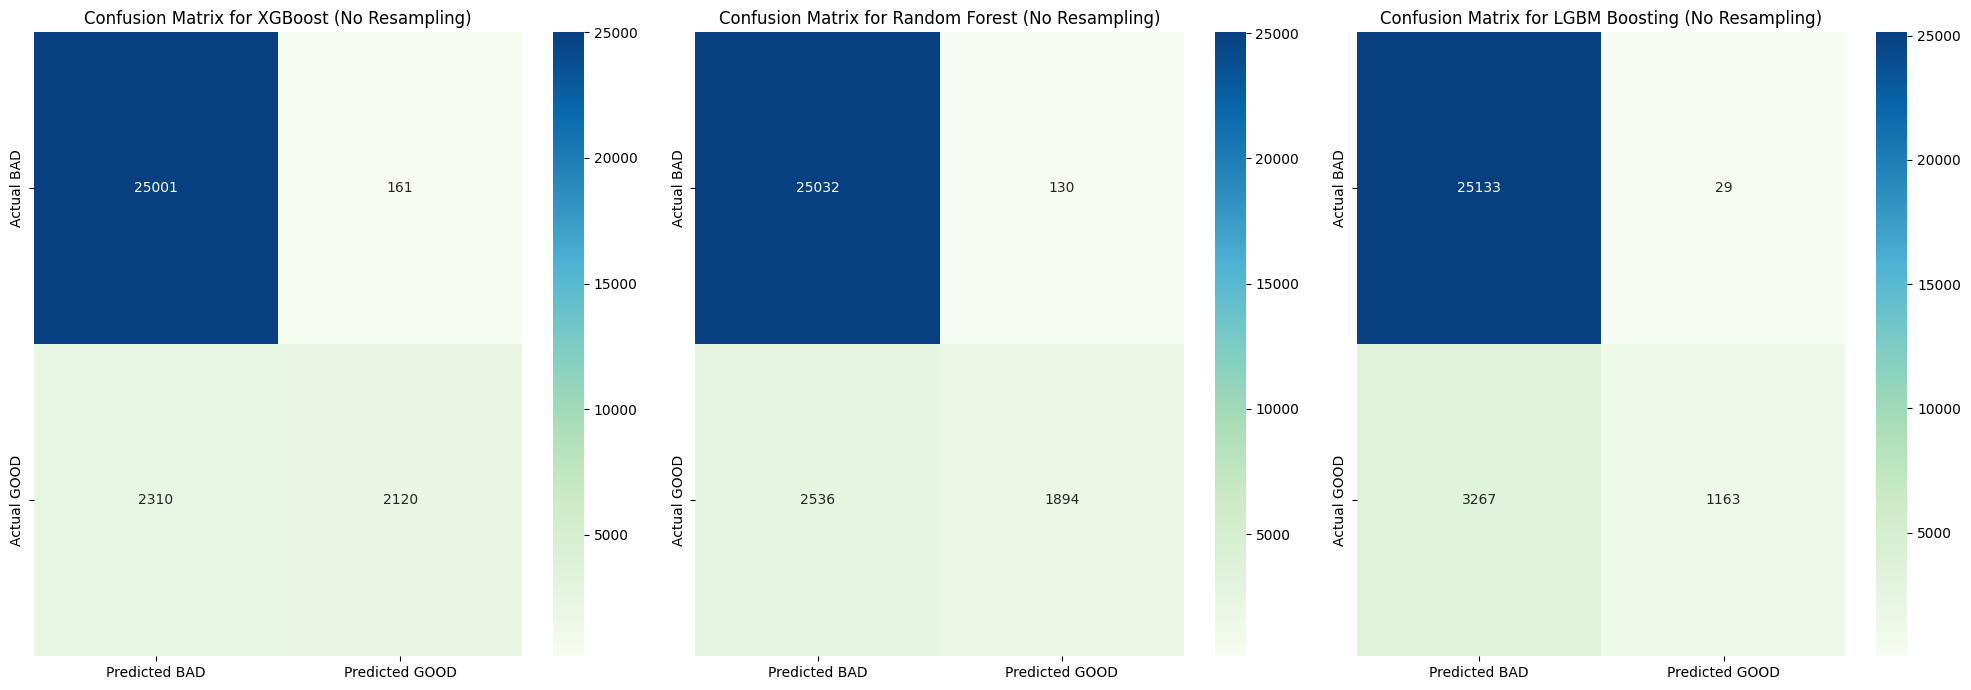

In [20]:
# List untuk menyimpan hasil
conf_matrix = []

# Iterasi model yang dipilih tanpa pengambilan sampel kembali
selected_models = [('XGBoost', xgb), ('Random Forest', rf), ('LGBM Boosting', lgbm)]

# Membuat DataFrame untuk menampilkan metrik
index_names = []

# Menampilkan matriks kebingungan untuk model yang dipilih tanpa pengambilan sampel kembali
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

for i, (model_name, model) in enumerate(selected_models):
    resample = None  # Tanpa pengambilan sampel kembali
    index_names.append(f'{model_name}_{resample}')

    if resample is None:
        pipeline_conf = Pipeline([
            ('model', model),
        ])
    else:
        pipeline_conf = Pipeline([
            ('resample', resample),
            ('model', model),
        ])

    pipeline_conf.fit(X_train_val, y_train_val)
    y_pred = pipeline_conf.predict(X_test)

    conf_matrix.append(confusion_matrix(y_test, y_pred))

# Menampilkan confusion matrix
for i, (model_name, _) in enumerate(selected_models):
    sns.heatmap(conf_matrix[i], annot=True, fmt='d', cmap='GnBu',
                xticklabels=['Predicted BAD', 'Predicted GOOD'],
                yticklabels=['Actual BAD', 'Actual GOOD'], ax=axes[i])
    axes[i].set_title(f"Confusion Matrix for {model_name} (No Resampling)");

plt.tight_layout()
plt.show()

Kita menggunakan matriks Accuracy sebagai parameternya karena kita ingin meningkatkan jumlah TP (Model berhasil memprediksi investasi baik) dan TF (Berhasil mendeteksi yang buruk) dan mengurangi jumlah TF (Model salah memprediksi investasi yang baik) dan mengurangi FN (luputnya investasi baik yang gagal dideteksi)

### `subsample` - Hyperparameter Tuning (XGBoosting)

In [34]:
max_subsample = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
testing_accXG = []
training_accXG = []
score0 = 0
best_sample = 0  # Inisialisasi variabel best_numLeaves

for i in max_subsample:
    xgb =  XGBClassifier(
        subsample=i,
        random_state=2024)
    xgb.fit(X_train_val, y_train_val)

    y_predict_train = xgb.predict(X_train_val)
    training_accXG.append(accuracy_score(y_train_val, y_predict_train))

    y_predict_test = xgb.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_predict_test)
    testing_accXG.append(accuracy_test)

    if score0 < accuracy_test:
        best_sample = i
        score0 = accuracy_test

In [35]:
print('best maximum subsample:', best_sample)
print(f'Accuracy score: {round(score0 * 100, 2)}%')

best maximum subsample: 1.0
Accuracy score: 91.65%


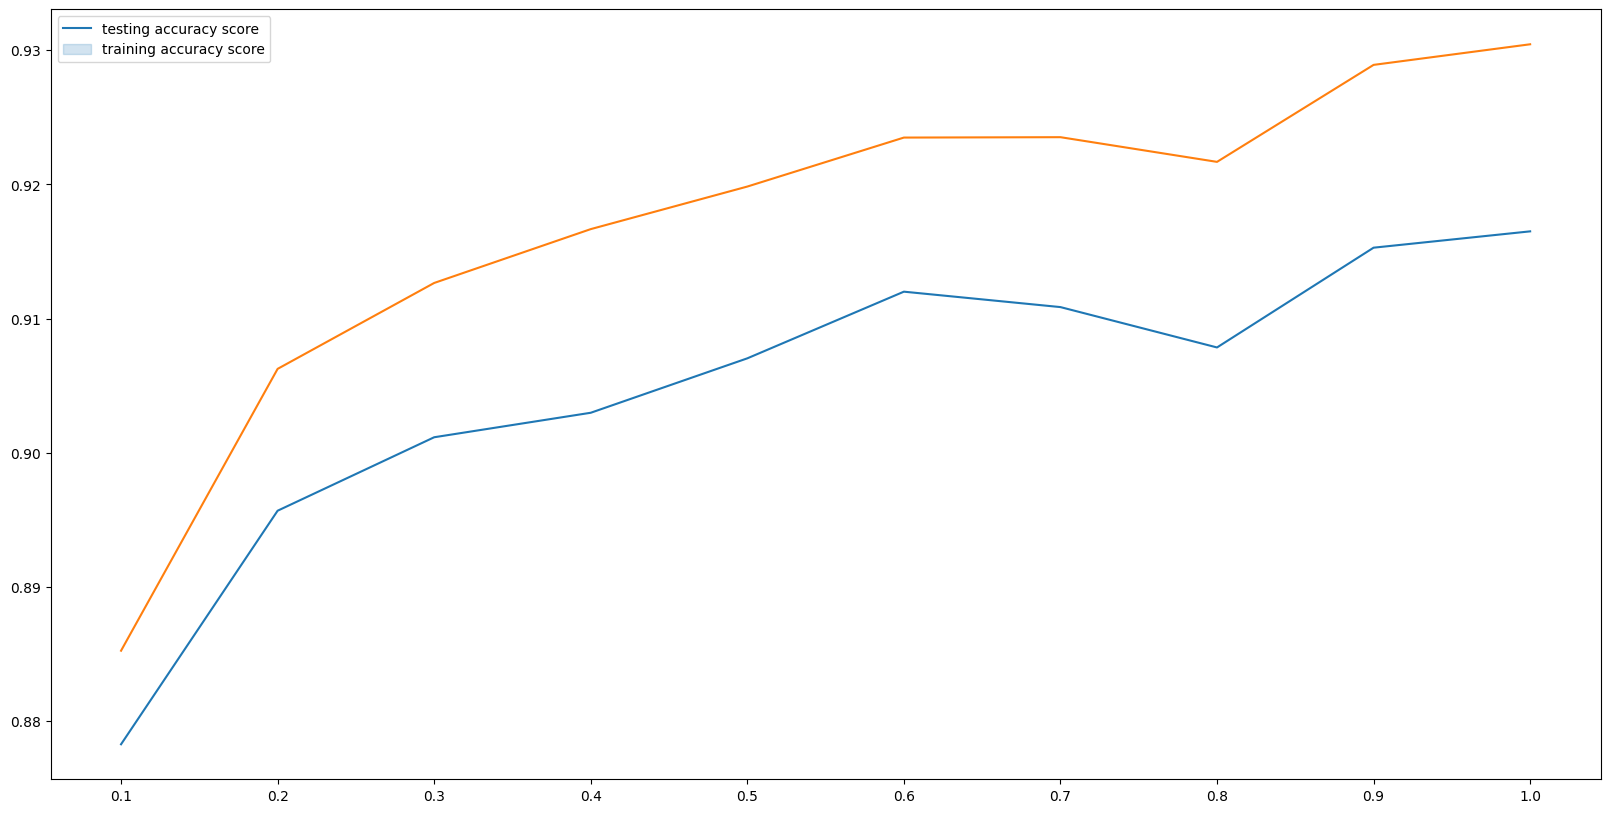

In [36]:
length = range(len(max_subsample))

plt.figure(figsize = (20,10))
sns.lineplot(x=length,y=testing_accXG)
sns.lineplot(x=length,y=training_accXG)
plt.legend(['testing accuracy score','training accuracy score'])
plt.xticks(length,max_subsample)
plt.show()

### `max_depth` - Hyperparameter Tuning (XGBoosting)

In [37]:
max_depth = range(2,31,2)
testing_accXG = []
training_accXG = []
score0 = 0
best_depth = 0  # Inisialisasi variabel best_numLeaves

for i in max_depth:
    xgb =  XGBClassifier(
        subsample=1,
        max_depth=i,
        random_state=2024)
    xgb.fit(X_train_val, y_train_val)

    y_predict_train = xgb.predict(X_train_val)
    training_accXG.append(accuracy_score(y_train_val, y_predict_train))

    y_predict_test = xgb.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_predict_test)
    testing_accXG.append(accuracy_test)

    if score0 < accuracy_test:
        best_depth = i
        score0 = accuracy_test

In [38]:
print('best maximum depth:', best_depth)
print(f'Accuracy score: {round(score0 * 100, 2)}%')

best maximum depth: 12
Accuracy score: 93.27%


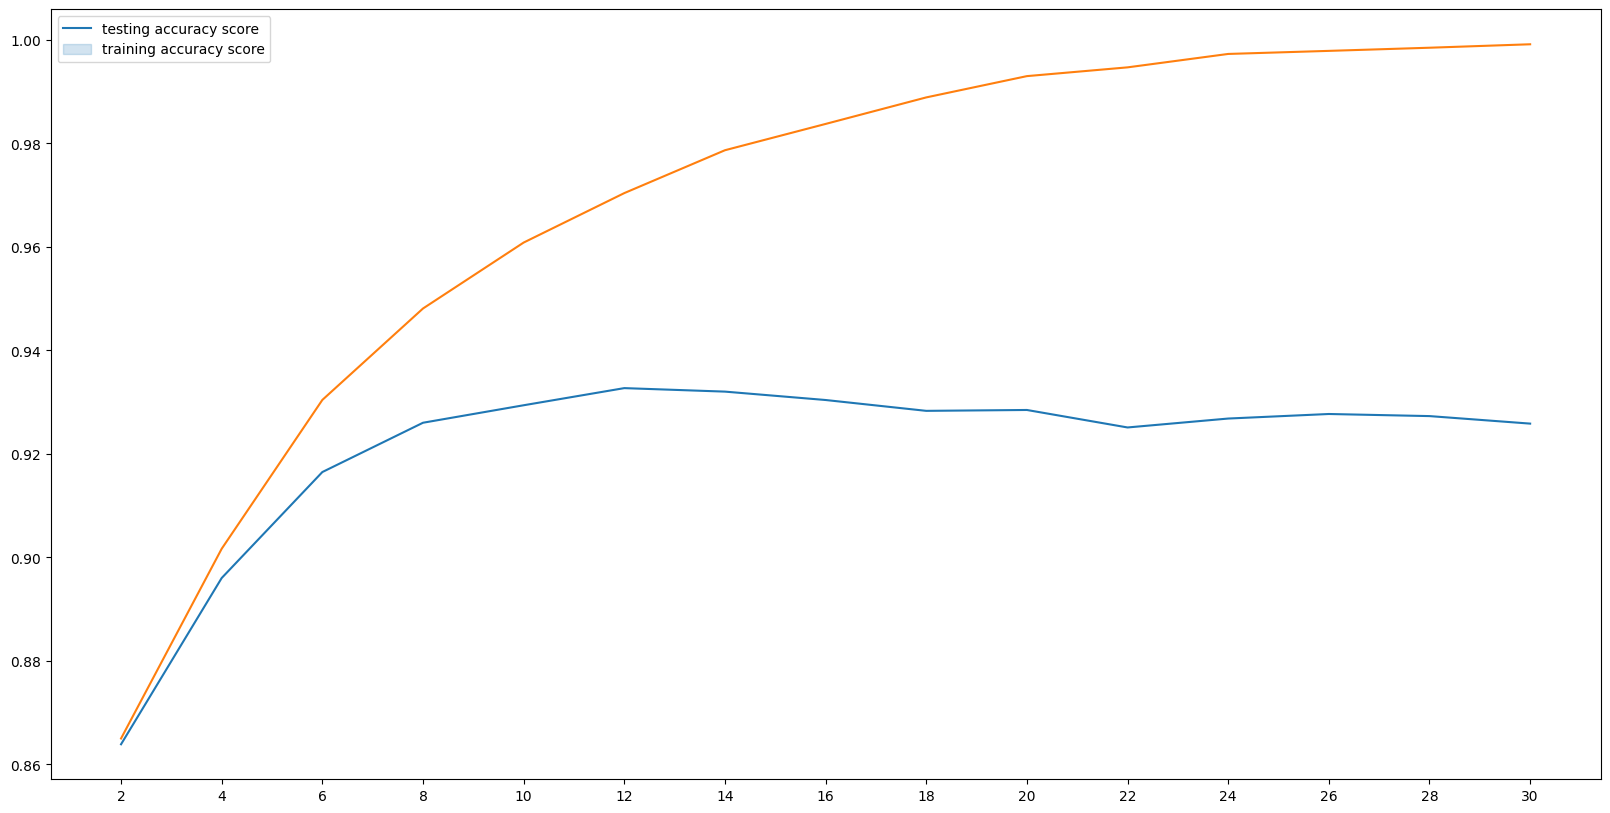

In [39]:
length = range(len(max_depth))

plt.figure(figsize = (20,10))
sns.lineplot(x=length,y=testing_accXG)
sns.lineplot(x=length,y=training_accXG)
plt.legend(['testing accuracy score','training accuracy score'])
plt.xticks(length,max_depth)
plt.show() # 12, 14, 20

### Parameter n_estimators : XG Boosting

In [43]:
# # Define Hyperparameter space

# hyperparam_space = {
#     'model__booster': ['gbtree', 'gblinear', 'dart'],
#     'model__max_depth': [12, 14, 20],
#     'model__eta': [0.2, 0.3, 0.4]
# }

# xgb =  XGBClassifier(subsample=1,random_state=2024)

# pipe_model = Pipeline([
#     ('resampling', None),
#     ('model', xgb)
# ])

# # Define the grid search
# gridsearch_xgb = GridSearchCV(
#     estimator=pipe_model,
#     param_grid=hyperparam_space,  # hyperparameter space
#     cv=StratifiedKFold(n_splits=5),  # cross-validation scheme
#     scoring = 'accuracy',   # evaluation metrics
#     n_jobs = -1   # To speed up the process by utilizing multiple cores of the machine
# )

# gridsearch_xgb.fit(X_train_val, y_train_val)

# Menyimpan Model

In [42]:
import pickle
# # Model Pickling
# # Hyperparameter tuning XGBoost model
# # gridsearch_xgb.fit(X_train_val, y_train_val)
# filename = '/content/drive/MyDrive/Mediawave Project/Machine Learning/XGBHyperTuning.pkl'
# pickle.dump(gridsearch_xgb,open(filename,'wb'))

# Membuka model
filename = '/content/drive/MyDrive/Mediawave Project/Machine Learning/XGBHyperTuning.pkl'
gridsearch_xgb = pickle.load(open(filename,'rb'))
gridsearch_xgb.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('resampling', None),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=2024, ...))]),
             n_jobs=-1,
             param_grid={'model__booster': ['gbtree', 'gblinear', 'dart'],
                         'model__eta': [0.2, 0.3, 0.4],
                         'model__max_depth': [12, 14, 20]},
             scoring='accuracy')

### obtaining json objects to try api

In [44]:
df['json'] = df.to_json(orient='records', lines=True).splitlines()

In [45]:
df

,Horizon_days,Open,High,Low,Close,Adj_Close,Volume,Investment,json
0,94.0,571.710999,571.710999,547.888977,547.888977,295.594818,57722.0,0,"{""Horizon_days"":94.0,""Open"":571.710999,""High"":..."
1,95.0,547.888977,547.888977,547.888977,547.888977,295.594818,83434.0,0,"{""Horizon_days"":95.0,""Open"":547.888977,""High"":..."
2,98.0,547.888977,547.888977,547.888977,547.888977,295.594818,10495.0,0,"{""Horizon_days"":98.0,""Open"":547.888977,""High"":..."
3,99.0,547.888977,547.888977,547.888977,547.888977,295.594818,352626.0,0,"{""Horizon_days"":99.0,""Open"":547.888977,""High"":..."
4,100.0,547.888977,547.888977,547.888977,547.888977,295.594818,59296.0,0,"{""Horizon_days"":100.0,""Open"":547.888977,""High""..."
...,...,...,...,...,...,...,...,...,...
98633,242.0,2250.000000,2270.000000,2210.000000,2220.000000,2220.000000,10656000.0,0,"{""Horizon_days"":242.0,""Open"":2250.0,""High"":227..."
98634,243.0,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,0.0,0,"{""Horizon_days"":243.0,""Open"":2220.0,""High"":222..."
98635,246.0,2220.000000,2230.000000,2130.000000,2140.000000,2140.000000,17671000.0,0,"{""Horizon_days"":246.0,""Open"":2220.0,""High"":223..."
98636,247.0,2140.000000,2150.000000,2050.000000,2100.000000,2100.000000,22314300.0,0,"{""Horizon_days"":247.0,""Open"":2140.0,""High"":215..."


In [46]:
df['json'][0]

'{"Horizon_days":94.0,"Open":571.710999,"High":571.710999,"Low":547.888977,"Close":547.888977,"Adj_Close":295.594818,"Volume":57722.0,"Investment":0}'

In [47]:
df['json'][4]

'{"Horizon_days":100.0,"Open":547.888977,"High":547.888977,"Low":547.888977,"Close":547.888977,"Adj_Close":295.594818,"Volume":59296.0,"Investment":0}'

In [56]:
df['json'].to_json('/content/drive/MyDrive/Mediawave Project/Machine Learning/data_machineLearning.json')

In [54]:
df3 = pd.read_csv('/content/drive/MyDrive/Mediawave Project/References_Wave/AI-Learn-to-invest/app/df_to_ml.csv')
df3

,Unnamed: 0,investment,company,sector,horizon (days),amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,0,0,17,2,2,100,0.383666,0.385748,0.383666,0.001437,12.58,12.0,3.73,0.38,3.19,3.01,1.49,8.69,26.69
1,1,1,26,4,330,15000,0.322809,0.236350,0.322809,0.170969,11.39,26.3,1.26,1.71,0.54,15.70,0.92,0.67,5.54
2,2,0,22,4,7,3000,0.238642,0.235491,0.238642,0.002824,10.58,19.8,5.64,1.67,2.60,15.68,1.91,3.39,25.78
3,3,0,15,2,5,20000,0.428559,0.429340,0.428559,0.000094,11.09,12.9,3.27,0.36,1.25,3.17,1.60,4.41,11.35
4,4,1,27,4,360,15000,0.194612,0.254011,0.194612,0.149979,9.38,27.9,5.46,1.87,0.81,19.91,0.99,0.81,8.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405253,405253,0,7,1,480,50000,0.241103,0.253235,0.241103,0.053763,23.98,30.6,1.19,0.31,1.07,1.29,1.27,1.18,4.87
405254,405254,1,23,4,300,50000,0.410470,0.535448,0.410470,0.009444,4.40,26.9,2.16,0.50,0.74,11.58,0.92,2.16,17.79
405255,405255,1,11,1,210,3000,0.316220,0.359625,0.316220,0.025642,12.02,16.3,3.71,1.46,4.27,12.06,1.74,7.02,31.43
405256,405256,0,0,0,270,500,0.173693,0.218904,0.173693,0.181797,16.74,16.5,2.43,3.55,5.90,21.12,1.24,13.83,37.37


In [58]:
# Memprediksi dataset uji menggunakan model terbaik dari proses pencarian grid
y_pred_xgb_pamTuning = gridsearch_xgb.predict(X_test)

accuracy_xgb_pamTuning = accuracy_score(y_test, y_pred_xgb_pamTuning) * 100
precision_xgb_pamTuning = precision_score(y_test, y_pred_xgb_pamTuning) * 100
recall_xgb_pamTuning = recall_score(y_test, y_pred_xgb_pamTuning) * 100
f1_xgb_pamTuning = f1_score(y_test, y_pred_xgb_pamTuning) * 100

xgb_after_pamTuning = pd.DataFrame({'Recall': recall_xgb_pamTuning,
                                    'Accuracy': accuracy_xgb_pamTuning,
                                   'Precision': precision_xgb_pamTuning,
                                  'F1': f1_xgb_pamTuning}, index=['XG Boost After Parameter Tuning'])

# Menampilkan metrik untuk Grid Search
df_metrics = df_metrics.rename(index={'XGBoost_none': 'XGBoost before Parameter Tuning'})
df_metrics = df_metrics.loc[['XGBoost before Parameter Tuning']]

df_metrics_tuning = pd.concat([xgb_after_pamTuning, df_metrics])
df_metrics_tuning

,Recall,Accuracy,Precision,F1
XG Boost After Parameter Tuning,66.185102,93.248175,85.431235,74.586619
XGBoost before Parameter Tuning,47.855530,91.649770,92.941692,63.179854


Setelah dilakukan hyper parameter tuning, berhasil menaikkan akurasi sebesar +1,599%

In [60]:
conf_matrix

[array([[25001,   161],
        [ 2310,  2120]]),
 array([[25032,   130],
        [ 2536,  1894]]),
 array([[25133,    29],
        [ 3267,  1163]])]

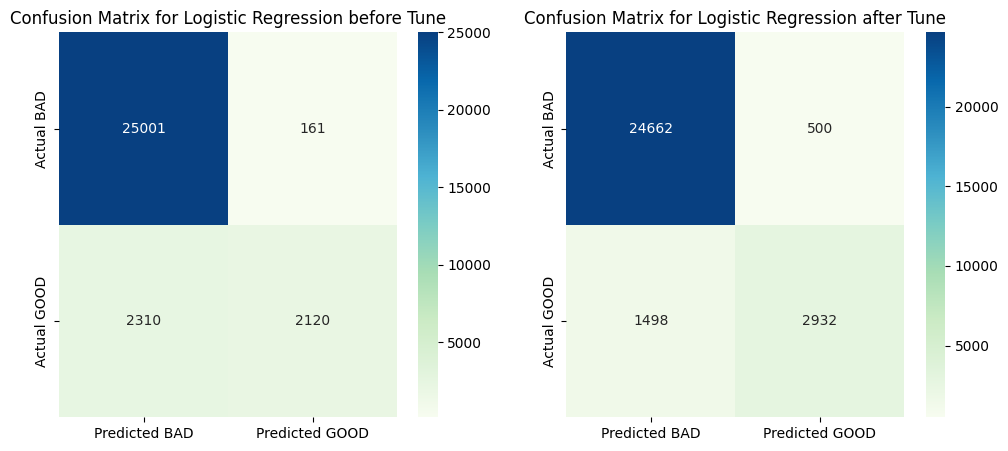

In [61]:
# Menampilkan matriks kebingungan untuk Regresi Logistik setelah penyetelan
conf_tuned_xgb = confusion_matrix(y_test, y_pred_xgb_pamTuning)

# Tentukan model dan matriks kebingungan
xgb_models = [('Logistic Regression', xgb), ('Logistic Regression', gridsearch_xgb)]
xgb_conf_matrices = [conf_matrix[0], conf_tuned_xgb]

# Menampilkan matriks kebingungan untuk Regresi Logistik sebelum dan sesudah penyetelan
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, (name, _) in enumerate(xgb_models):
    sns.heatmap(xgb_conf_matrices[i], annot=True, fmt='d', cmap='GnBu',
                xticklabels=['Predicted BAD', 'Predicted GOOD'],
                yticklabels=['Actual BAD', 'Actual GOOD'], ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {name}' + (' before Tune' if i < len(xgb_models) - 1 else ' after Tune'))


In [62]:
X

,Horizon_days,Open,High,Low,Close,Adj_Close,Volume
0,94.0,571.710999,571.710999,547.888977,547.888977,295.594818,57722.0
1,95.0,547.888977,547.888977,547.888977,547.888977,295.594818,83434.0
2,98.0,547.888977,547.888977,547.888977,547.888977,295.594818,10495.0
3,99.0,547.888977,547.888977,547.888977,547.888977,295.594818,352626.0
4,100.0,547.888977,547.888977,547.888977,547.888977,295.594818,59296.0
...,...,...,...,...,...,...,...
98633,242.0,2250.000000,2270.000000,2210.000000,2220.000000,2220.000000,10656000.0
98634,243.0,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,0.0
98635,246.0,2220.000000,2230.000000,2130.000000,2140.000000,2140.000000,17671000.0
98636,247.0,2140.000000,2150.000000,2050.000000,2100.000000,2100.000000,22314300.0


In [64]:
import joblib

# Save features from training
rnd_columns = list(X.columns)
joblib.dump(rnd_columns, '/content/drive/MyDrive/Mediawave Project/Machine Learning/ML_columns.pkl')
print("Machine Learning Model Colums Saved")

Machine Learning Model Colums Saved
